# Text Data Cleaning & Preprocessing

In [ ]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 18.6 MB/s eta 0:00:00


In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np

#for mount drive
from google.colab import drive

# for regular expressions, emojis & tokenization
import re

#for removing punctuation
import string

#for spelling correction
from textblob import TextBlob

#for stopwords
import nltk
from nltk.corpus import stopwords

#for replace emojis
import emoji

#for tokenization
from nltk.tokenize import word_tokenize,sent_tokenize

#for tokenization
import spacy

#for stemming
from nltk.stem.porter import PorterStemmer

#for lemmatization
from nltk.stem import WordNetLemmatizer

In [ ]:
#import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import data
df=pd.read_csv('/content/drive/MyDrive/IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Data Cleaning

In [ ]:
#total rows & columns of the data
df.shape

(50000, 2)

In [ ]:
# basic information about data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
#checking unique categories of data
df.sentiment.unique()

array(['positive', 'negative'], dtype=object)

In [ ]:
#total null values
df.isnull().sum()

,0
review,0
sentiment,0


In [ ]:
#total duplicate values
df.duplicated().sum()

np.int64(418)

In [ ]:
# removing duplicates
df.drop_duplicates(inplace=True)

In [ ]:
#checking duplicates again
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(49582, 2)

<Axes: ylabel='count'>

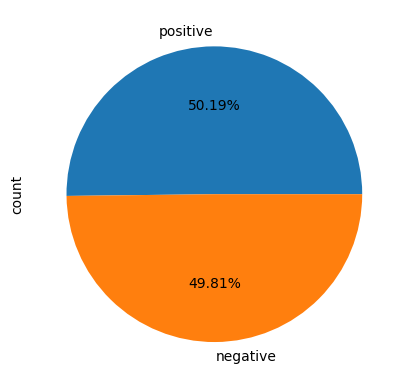

In [ ]:
df['sentiment'].value_counts().plot(kind='pie',autopct='%1.2f%%')

## Data Preprocessing

###1. Conversion of Data to Lower Case:

#### Benifits:
* Uniformity: Makes all words consistent (e.g., “Apple”, “APPLE”, and “apple” become the same).

* Reduce vocabulary size: Fewer unique tokens → faster and more efficient model training.

* Improves performance: Removes unnecessary case-related noise for most NLP tasks.

* Avoid duplication: Prevents treating the same word with different cases as separate words.

In [ ]:
df['review']=df['review'].str.lower()

In [ ]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


### 2. Removing html Tags

In [ ]:
#function for remove html tags
def remove_html_tags(text):
  pattern=re.compile('<.*?>')
  return pattern.sub(r'',text)


In [ ]:
# test on example
text="<html><body><p> Movie 1</p><p> Actor - Aamir Khan</p></p> Click here to <a href='http://google.com'> download </a></p></body></html> "
remove_html_tags(text)

' Movie 1 Actor - Aamir Khan Click here to  download  '

In [ ]:
#apply on dataset
df['review']=df['review'].apply(remove_html_tags)

### 3. Remove URLS

In [ ]:
# reove url's from text
def remove_url(text):
    url=re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

In [ ]:
# example test
text='Battery Life One of the standout features is the impressive battery life. The headphones offer up to  30 hours of continuous playback on a single charge, making them ideal for long journeys.For more information on battery performance, read the "https://www.example.com/battery-life" battery life report'
remove_url(text)

'Battery Life One of the standout features is the impressive battery life. The headphones offer up to  30 hours of continuous playback on a single charge, making them ideal for long journeys.For more information on battery performance, read the " battery life report'

In [ ]:
#apply on dataset
df['review']=df['review'].apply(remove_url)

In [ ]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


###4. Remove Punctuations:

#### Reason:
* Reduce noise: they don’t add meaning in most tasks.

* Lower vocabulary size: avoids treating “word” and “word.” as different.

* Improve model performance: cleaner and faster training.

In [ ]:
#calling punctuation method from string
exclude=string.punctuation
print(exclude)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


* str.maketrans('', '', exclude) → creates a table telling which chars to remove (punctuations).

* text.translate() → applies that rule and deletes all punctuations from the text.

In [ ]:
#removing punctuations
def remove_punctuation(text):
  return text.translate(str.maketrans('', '', exclude))

In [ ]:
# example test
text='Hello, how are you?'
remove_punctuation(text)

'Hello how are you'

In [ ]:
#apply on data set
df['review']=df['review'].apply(remove_punctuation)

In [ ]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive


### 5. Remove Chatwords

In [ ]:
#dictionary for chatwords
chatwords = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "LOL": "Laughing out loud",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don’t care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "IDC": "I don’t care",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "LMAO": "Laughing my a** off",
    "BFF": "Best friends forever",
    "CSL": "Can’t stop laughing"
}


In [ ]:
# function for remove chatwords
def chat_conversation(text):
    new_text=[]
    for word in text.split():
        if word.upper() in chatwords:
            new_text.append(chatwords[word.upper()])
        else:
            new_text.append(word)
    return " ".join(new_text)


In [ ]:
#example test
chat_conversation('IMHO he is the best')

'In My Honest/Humble Opinion he is the best'

In [ ]:
#apply on data
df['review']=df['review'].apply(chat_conversation)

In [ ]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend Te...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the Tears in my eyes of...,positive


###6. Spelling Correction

In [ ]:
#function for spelling correction
def spell_correction(text):
  text_correct=TextBlob(text)
  return text_correct.correct().string

In [ ]:
#example test
text='certain conditionas duriing severl generationns aree modefid in the same manerr'
spell_correction(text)

'certain conditions during several generations are modified in the same manner'

In [ ]:
#apply on dataset
df['review']=df['review'].apply(spell_correction)

###7. Removing Stopword:
The words that re help full to make a sentence but haven't any role in sentence meaning creation. Some tasks in which you don't remove stopwords such as Parts of speech tagging.

`EX : 'a','the','of','my','are', etc....`





In [ ]:
#download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#english stopwords list
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [ ]:
#remove stopwords functon
def remove_stopwords(text):
  new_text=[]

  for word in text.split():
    if word.lower() in stopwords.words('english'):
      new_text.append('')
    else:
      new_text.append(word)

  x=new_text[:]
  new_text.clear()
  return " ".join(x)

In [ ]:
# example test
remove_stopwords('probably my all-time favourite movie, a story of selflessness, secrifice and dedication to a noble cause,')

'probably  all-time favourite movie,  story  selflessness, secrifice  dedication   noble cause,'

In [ ]:
# apply on dataset
df['review']=df['review'].apply(remove_stopwords)
df.head()

,review,sentiment
0,one reviewers mentioned watching 1 oz e...,positive
1,wonderful little production filming techniqu...,positive
2,thought wonderful way spend Tears eyes ...,positive
3,basically theres family little boy jake thi...,negative
4,petter matteis love Tears eyes money vi...,positive


### 8. Handling Emojis:
There are two options tohandle emojis.
1. Remove : Remove the emojis from the data.
2. Replace : Replace the emojis with their meaning.

In [ ]:
# function for remove emojis
def remove_emojis(text):
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F680-\U0001F6FF"  # transport & map symbols
        "\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "\U00002702-\U000027B0"  # Dingbats
        "\U000024C2-\U0001F251"  # Enclosed CJK Letters and Months
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [ ]:
#example test
remove_emojis("Hello 😊 World 🌍! This is fun 🎉")

'Hello  World ! This is fun '

In [ ]:
#fnction for replace emojis
def replace_emojis(text):
  return emoji.demojize(text)


In [ ]:
#example test
replace_emojis("Python is 🔥")

'Python is :fire:'

In [ ]:
#apply on Data Set ----> replace
df['review']=df['review'].apply(replace_emojis)

###9. Tokenization
The process of breaking text into smaller parts is known as tokenization.Tokenization is essential because it breaks text into words/subwords, allowing feature engineering to extract meaningful numerical features from text.

There aretwo types of tokenization:

1. Word Tokenization:
`Ex : I am a Pakistani. I Love my Country ====> [I, am, a, Pakistani, I, Love, my, Country]`

2. Sentence Tokenization:
`Ex : I am a Pakistani. I Love my Country ====>[[I am a Pakistani],[I Love my Country]]`








####1. Use pyhon split function directly to tokenize the data

In [ ]:
#word tokenization
sent='I am a Pakistani. I Love my Country'
sent.split()

['I', 'am', 'a', 'Pakistani.', 'I', 'Love', 'my', 'Country']

In [ ]:
#sentence tokenization
sent='I am a Pakistani. I Love my Country'
sent.split('.')

['I am a Pakistani', ' I Love my Country']

####2. Regular Expression for Tokenization

In [ ]:
sent= ' The car is going 10km faster'
tokens=re.findall("[\w']+",sent)
tokens

<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:2: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipython-input-3500586702.py:2: SyntaxWarning: invalid escape sequence '\w'
  tokens=re.findall("[\w']+",sent)


['The', 'car', 'is', 'going', '10km', 'faster']

####3. Using nltk Library


In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
sent= ' The car is going 10km faster'
tokens=word_tokenize(sent)
tokens

['The', 'car', 'is', 'going', '10km', 'faster']

In [ ]:
sent= ' The car is going 10km faster'
tokens=sent_tokenize(sent)
tokens

[' The car is going 10km faster']

####4. Using Sapcy Library

In [ ]:
tokens=spacy.load('en_core_web_sm')

In [ ]:
sent= ' The car is going 10km faster'

In [ ]:
tokens=tokens(sent)

In [ ]:
for token in tokens:
  print(token)

 
The
car
is
going
10
km
faster


In [ ]:
#function for tokenization by nltk
def tokenization(text):
    word_token=word_tokenize(text)
    return word_token

In [ ]:
#apply on dataset by nltk tokenizer
df['review']=df['review'].apply(tokenization)

In [ ]:
df.head()

,review,sentiment
0,one reviewers mentioned watching 1 oz e...,positive
1,wonderful little production filming techniqu...,positive
2,thought wonderful way spend Tears eyes ...,positive
3,basically theres family little boy jake thi...,negative
4,petter matteis love Tears eyes money vi...,positive


### 10. Stemming & Limmatization:
Stemming is the prcess of reducing "inflection"  in words to their root forms such as mapping a group of words to the same stem even if the stem itself is not a valid word in the language. This concet is very helpfull in NLP specially in information retrieval systems like GOOGLE.

#### What is Inflection:
Inflection is the concept in  English that means changing the form of a word to express things like tense, number, gender, or degree — but the core meaning of the word stays the same.


```
EX:
* cat → cats
* walk → walked → walking
* big → bigger → biggest

```



In [ ]:
#object of porter stemmer
ps=PorterStemmer()

In [ ]:
#function for stemming
def stem_words(text):
  return  [ps.stem(word) for word in text ]

In [ ]:
sample=["walk","walks","walking","walked"]
stem_words(sample)

['walk', 'walk', 'walk', 'walk']

In [ ]:
df['review']=df['review'].apply(stem_words)

In [ ]:
df.head()

,review,sentiment
0,"[one, reviewers, mentioned, watching, 1, oz, e...",positive
1,"[wonderful, little, production, filming, techn...",positive
2,"[thought, wonderful, way, spend, Tears, eyes, ...",positive
3,"[basically, theres, family, little, boy, jake,...",negative
4,"[petter, matteis, love, Tears, eyes, money, vi...",positive


In [ ]:
df['review'][0]

['one',
 'reviewers',
 'mentioned',
 'watching',
 '1',
 'oz',
 'episode',
 'youll',
 'hooked',
 'right',
 'exactly',
 'happened',
 'methe',
 'first',
 'thing',
 'struck',
 'oz',
 'brutality',
 'unflinching',
 'scenes',
 'violence',
 'set',
 'right',
 'word',
 'go',
 'trust',
 'show',
 'faint',
 'hearted',
 'timid',
 'show',
 'pulls',
 'punches',
 'regards',
 'drugs',
 'sex',
 'violence',
 'hardcore',
 'classic',
 'use',
 'wordit',
 'called',
 'oz',
 'nickname',
 'given',
 'oswald',
 'maximum',
 'security',
 'state',
 'penitentary',
 'focuses',
 'mainly',
 'emerald',
 'city',
 'experimental',
 'section',
 'prison',
 'cells',
 'glass',
 'fronts',
 'face',
 'inwards',
 'privacy',
 'high',
 'agenda',
 'em',
 'city',
 'home',
 'manyaryans',
 'muslims',
 'gangstas',
 'latinos',
 'christians',
 'italians',
 'irish',
 'moreso',
 'scuffles',
 'death',
 'stares',
 'dodgy',
 'dealings',
 'shady',
 'agreements',
 'never',
 'far',
 'awayi',
 'would',
 'say',
 'main',
 'appeal',
 'show',
 'due',
 'f

Note: The stemmed word is not always a valid word, it just chops off the end of words to get the root form, doesn't care about meaning or grammar.

```
Example:

 “studies” → “studi”

 “better” → “bett”

```

**Lemmatization** converts a word to its base (dictionary) form using vocabulary and grammar rules.


```

Example:

“studies” → “study”

“better” → “good”
```
But stemming is fast as compare to lemmatization


 #### wordnet lematization:
wordnet is the lexical dictionary in which all the related words in grammer context are stored.So we actually search the exact gramatic base word (lemma) in this dictionary

In [ ]:
#download wordnet
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
#initiallize object
lemmatizer=WordNetLemmatizer()

In [ ]:
#function for lemmatization
def lemmatize_text(text):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in text]
    return lemmatized_tokens

In [ ]:
#examle test
sent=['I','Like','Playing','Football']
lemmatize_text(sent)

['I', 'Like', 'Playing', 'Football']

In [ ]:
#apply on data
df['review'] = df['review'].apply(lemmatize_text)

In [ ]:
df.head()

,review,sentiment
0,"[one, reviewer, mentioned, watching, 1, oz, ep...",positive
1,"[wonderful, little, production, filming, techn...",positive
2,"[thought, wonderful, way, spend, Tears, eye, h...",positive
3,"[basically, there, family, little, boy, jake, ...",negative
4,"[petter, matteis, love, Tears, eye, money, vis...",positive


In [ ]:
df.review[0]

['one',
 'reviewer',
 'mentioned',
 'watching',
 '1',
 'oz',
 'episode',
 'youll',
 'hooked',
 'right',
 'exactly',
 'happened',
 'methe',
 'first',
 'thing',
 'struck',
 'oz',
 'brutality',
 'unflinching',
 'scene',
 'violence',
 'set',
 'right',
 'word',
 'go',
 'trust',
 'show',
 'faint',
 'hearted',
 'timid',
 'show',
 'pull',
 'punch',
 'regard',
 'drug',
 'sex',
 'violence',
 'hardcore',
 'classic',
 'use',
 'wordit',
 'called',
 'oz',
 'nickname',
 'given',
 'oswald',
 'maximum',
 'security',
 'state',
 'penitentary',
 'focus',
 'mainly',
 'emerald',
 'city',
 'experimental',
 'section',
 'prison',
 'cell',
 'glass',
 'front',
 'face',
 'inwards',
 'privacy',
 'high',
 'agenda',
 'em',
 'city',
 'home',
 'manyaryans',
 'muslim',
 'gangsta',
 'latino',
 'christian',
 'italian',
 'irish',
 'moreso',
 'scuffle',
 'death',
 'stare',
 'dodgy',
 'dealing',
 'shady',
 'agreement',
 'never',
 'far',
 'awayi',
 'would',
 'say',
 'main',
 'appeal',
 'show',
 'due',
 'fact',
 'go',
 'show'